<a href="https://colab.research.google.com/github/joelma78/GitPY/blob/main/TrabMA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Carregar o arquivo CSV
df = pd.read_csv('/content/train_titanic.csv')

# Visualizar as primeiras 5 linhas da tabela
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ver valores gerais do Dataset

In [3]:
# Mostrar resumo das colunas, tipos e valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ver Valores Ausentes

In [4]:
# Contar quantos valores faltam em cada coluna
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Preencher Valores Faltantes

In [5]:
# Preencher idade (Age) com a média
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Preencher embarque (Embarked) com a moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Remover a coluna 'Cabin' (muitos nulos)
df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-4155591325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-4155591325.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Codificar Variaveis Categóricas -Variáveis nominais OneHotEncoder

In [6]:
# Codificar sexo e porto de embarque
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [7]:
#Variável ordinal → OrdinalEncoder (Pclass já é numérica, mas é ordinal)
# Nada a fazer: Pclass já está como 1, 2, 3



In [8]:
#Separar variáveis numéricas
# Selecionar algumas colunas numéricas
numericas = ['Age', 'Fare', 'SibSp', 'Parch']

# Mostrar estatísticas básicas
df[numericas].describe()


,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,13.002015,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,29.699118,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


Padronizar (Z-score)

In [9]:
from sklearn.preprocessing import StandardScaler

# Criar o padronizador
scaler = StandardScaler()

# Aplicar
df_padronizado = df.copy()
df_padronizado[numericas] = scaler.fit_transform(df[numericas])

# Ver o resultado
df_padronizado[numericas].head()


,Age,Fare,SibSp,Parch
0,-0.592481,-0.502445,0.432793,-0.473674
1,0.638789,0.786845,0.432793,-0.473674
2,-0.284663,-0.488854,-0.474545,-0.473674
3,0.407926,0.420730,0.432793,-0.473674
4,0.407926,-0.486337,-0.474545,-0.473674


 Normalizar (0 a 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Criar o normalizador
normalizador = MinMaxScaler()

# Aplicar
df_normalizado = df.copy()
df_normalizado[numericas] = normalizador.fit_transform(df[numericas])

# Ver o resultado
df_normalizado[numericas].head()


,Age,Fare,SibSp,Parch
0,0.271174,0.014151,0.125,0.0
1,0.472229,0.139136,0.125,0.0
2,0.321438,0.015469,0.000,0.0
3,0.434531,0.103644,0.125,0.0
4,0.434531,0.015713,0.000,0.0


Visualizar antes e depois (Exemplo: Fare)

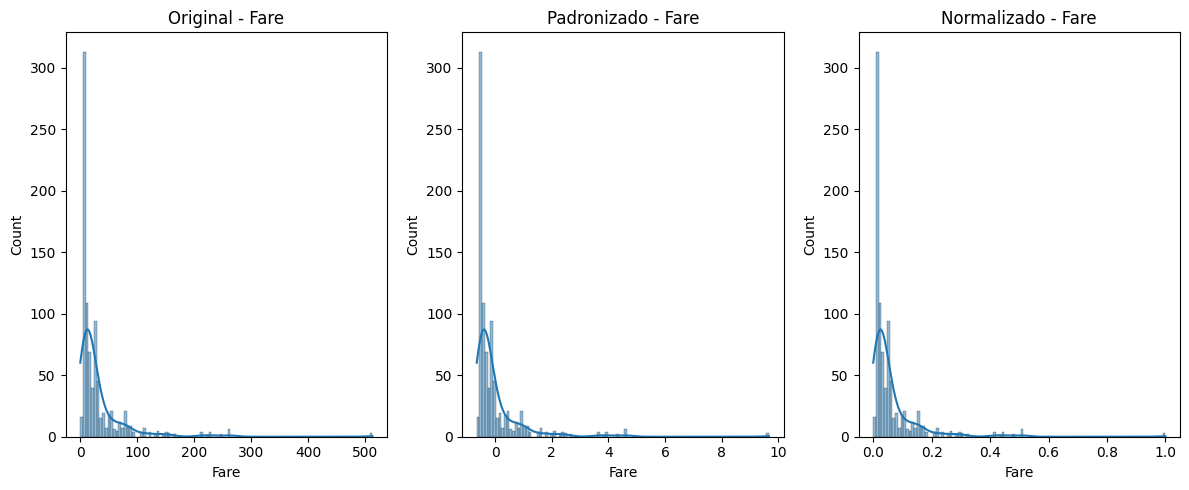

In [11]:
plt.figure(figsize=(12,5))

# Antes
plt.subplot(1, 3, 1)
sns.histplot(df['Fare'], kde=True)
plt.title('Original - Fare')

# Padronizado
plt.subplot(1, 3, 2)
sns.histplot(df_padronizado['Fare'], kde=True)
plt.title('Padronizado - Fare')

# Normalizado
plt.subplot(1, 3, 3)
sns.histplot(df_normalizado['Fare'], kde=True)
plt.title('Normalizado - Fare')

plt.tight_layout()
plt.show()
